

# **Machine Learning Lab Project ⚡**
## Dhiren Gangishetty 20BCE7432

#### L1+L2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/ADANIGREEN.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-06-18,30.000000,31.500000,28.500000,31.500000,31.500000,7006229
1,2018-06-19,32.700001,33.049999,31.000000,32.599998,32.599998,2895692
2,2018-06-20,31.500000,32.200001,31.000000,31.000000,31.000000,1115553
3,2018-06-21,29.450001,30.000000,29.450001,29.650000,29.650000,2854524
4,2018-06-22,28.200001,29.799999,28.200001,29.450001,29.450001,1612972


In [ ]:
df.shape

(1088, 7)

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1.088000e+03
mean,801.724678,819.050459,780.776104,800.046139,800.046139,1.416146e+06
std,798.009719,815.653654,775.132617,794.330290,794.330290,2.128524e+06
min,24.750000,26.049999,22.799999,25.200001,25.200001,2.679600e+04
25%,52.749999,54.425000,51.187501,52.462499,52.462499,4.475380e+05
50%,536.274994,556.974976,525.925018,548.599976,548.599976,8.658455e+05
75%,1231.912506,1257.412506,1204.050049,1227.312531,1227.312531,1.620870e+06
max,3035.000000,3050.000000,2850.000000,2970.500000,2970.500000,4.514809e+07


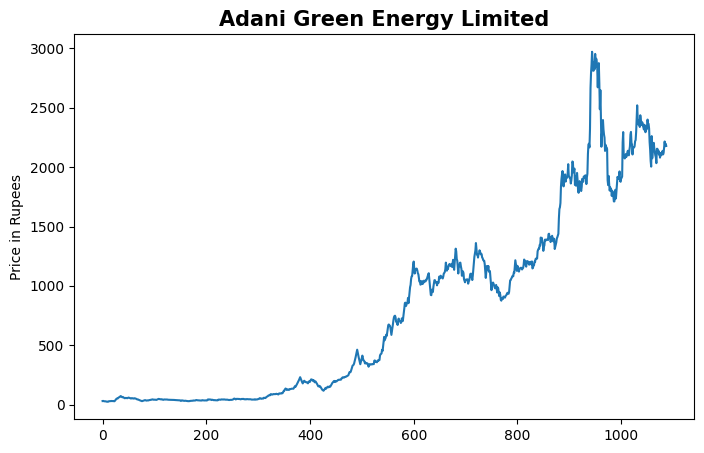

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(df['Close'])
plt.title('Adani Green Energy Limited', fontsize=15,fontweight='bold')
plt.ylabel('Price in Rupees')
plt.show()

In [ ]:
df = df.drop(['Adj Close'], axis=1)

In [ ]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

<ipython-input-10-7c2ce98b9745>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)
<ipython-input-10-7c2ce98b9745>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[col])


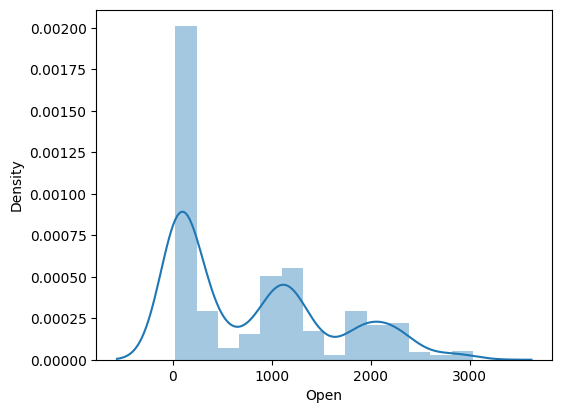

<ipython-input-10-7c2ce98b9745>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[col])


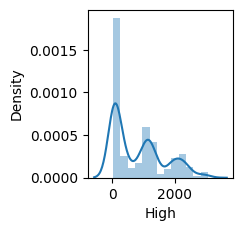

<ipython-input-10-7c2ce98b9745>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[col])


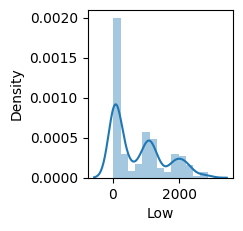

<ipython-input-10-7c2ce98b9745>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[col])


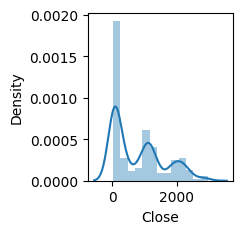

<ipython-input-10-7c2ce98b9745>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[col])


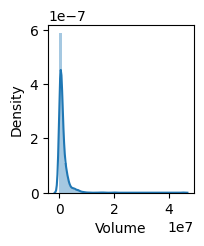

In [ ]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.distplot(df[col])
    plt.show()

<ipython-input-11-ce0c10626bd5>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)


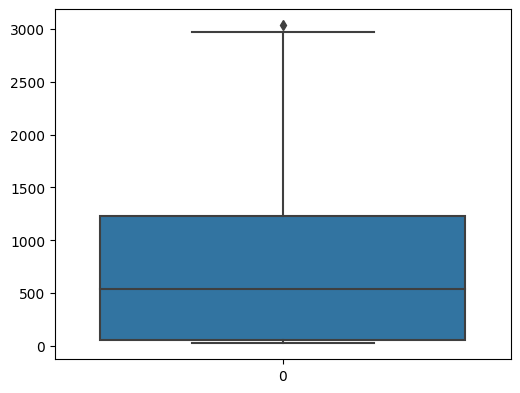

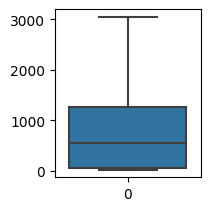

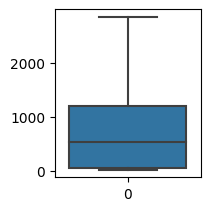

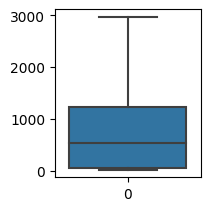

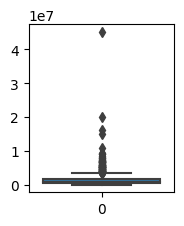

In [ ]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
  plt.show()

In [ ]:
splitted = df['Date'].str.split('-', expand=True)

df['day'] = splitted[1].astype('int')
df['year'] = splitted[0].astype('int')
df['month'] = splitted[2].astype('int')
df.tail()

,Date,Open,High,Low,Close,Volume,day,year,month
1083,2022-11-07,2127.0,2184.000000,2127.000000,2165.699951,1094562,11,2022,7
1084,2022-11-09,2174.0,2258.800049,2163.600098,2215.500000,1739571,11,2022,9
1085,2022-11-10,2225.0,2245.350098,2155.000000,2176.000000,746766,11,2022,10
1086,2022-11-11,2207.0,2237.899902,2177.199951,2196.699951,770505,11,2022,11
1087,2022-11-14,2200.0,2200.000000,2160.000000,2178.550049,628699,11,2022,14


In [ ]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.tail()

,Date,Open,High,Low,Close,Volume,day,year,month,is_quarter_end
1083,2022-11-07,2127.0,2184.000000,2127.000000,2165.699951,1094562,11,2022,7,0
1084,2022-11-09,2174.0,2258.800049,2163.600098,2215.500000,1739571,11,2022,9,1
1085,2022-11-10,2225.0,2245.350098,2155.000000,2176.000000,746766,11,2022,10,0
1086,2022-11-11,2207.0,2237.899902,2177.199951,2196.699951,770505,11,2022,11,0
1087,2022-11-14,2200.0,2200.000000,2160.000000,2178.550049,628699,11,2022,14,0


<ipython-input-14-0f87c70eeb8e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_grouped = df.groupby('year').mean()
<ipython-input-14-0f87c70eeb8e>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,i+1)


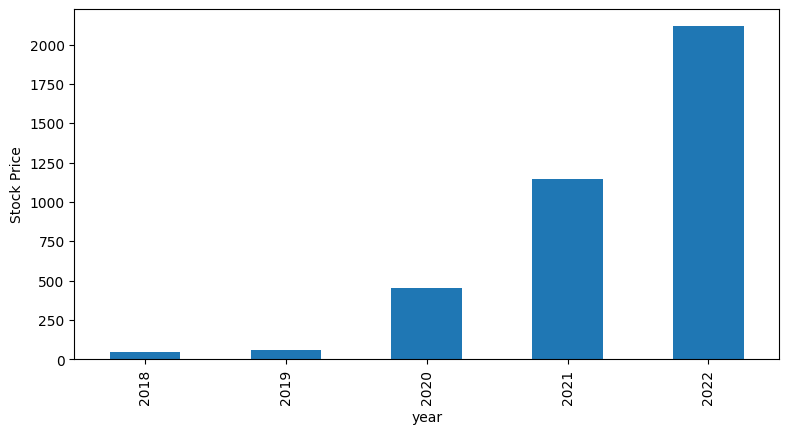

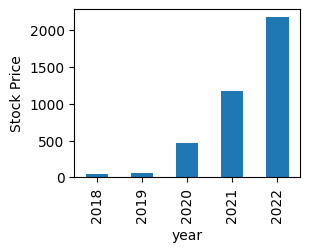

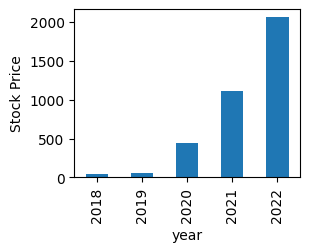

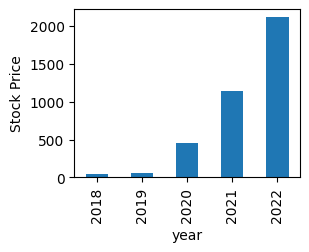

In [ ]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  plt.xlabel('Year')
  plt.ylabel('Stock Price')
  data_grouped[col].plot.bar()
  plt.show()

In [ ]:
def prepare_data(df,forecast_col,forecast_out,test_size):
    label = df[forecast_col].shift(-forecast_out)
    X = np.array(df[[forecast_col]])
    X = preprocessing.scale(X)
    X_lately = X[-forecast_out:]
    X = X[:-forecast_out]
    label.dropna(inplace=True)
    y = np.array(label)
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=0) #cross validation

    response = [X_train,X_test , Y_train, Y_test , X_lately]
    return response

In [ ]:
forecast_col = 'Close'
forecast_out = 5
test_size = 0.2

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X_train, X_test, Y_train, Y_test , X_lately =prepare_data(df,forecast_col,forecast_out,test_size);
learner = LinearRegression()
learner.fit(X_train,Y_train)

LinearRegression()

In [ ]:
score=learner.score(X_test,Y_test)
forecast= learner.predict(X_lately)
response={}
response['test_score']=score*100
response['forecast_set']=forecast

print(response)

{'test_score': 98.65334566231199, 'forecast_set': array([2171.64728699, 2221.29927745, 2181.91671333, 2202.55512213,
       2184.45918088])}


In [ ]:
score_lin=score*100

In [ ]:
price=np.mean(forecast)
print("Predicted Price: Rs. {:0.2f} ".format(price))

Predicted Price: Rs. 2192.38 


In [ ]:
pred_lin=price

In [ ]:
y_pred=learner.predict(X_train)

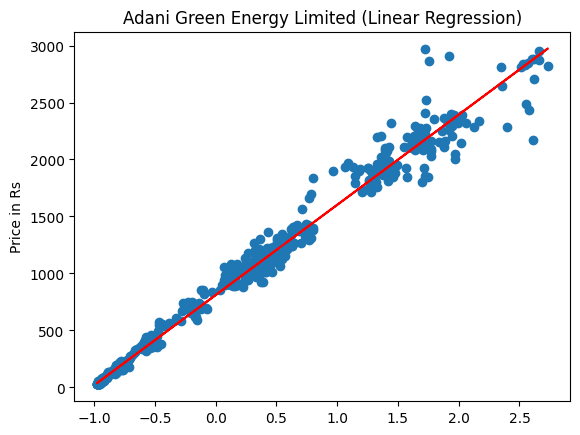

In [ ]:
plt.scatter(X_train, Y_train)
plt.title("Adani Green Energy Limited (Linear Regression)")
plt.ylabel("Price in Rs")
plt.plot(X_train, y_pred, color='red')
plt.show()

### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 40, random_state = 0)
regressor.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=40, random_state=0)

In [ ]:
score=regressor.score(X_test,Y_test)
forecast= regressor.predict(X_lately)
response={}
response['test_score']=score*100
response['forecast_set']=forecast

print(response)

{'test_score': 98.37869530588172, 'forecast_set': array([2631.3337677 , 2096.30376897, 2439.15498958, 2633.32504895,
       2438.96748958])}


In [ ]:
score_random=score*100

In [ ]:
price=np.mean(forecast)
print("Predicted Price: Rs. {:0.2f} ".format(price))

Predicted Price: Rs. 2447.82 


In [ ]:
pred_random=price

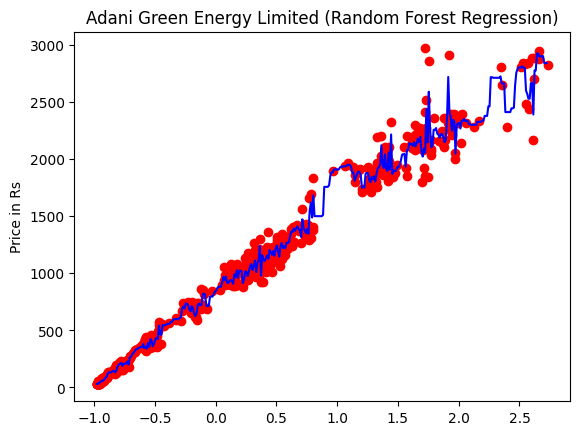

In [ ]:
X_grid = np.arange(min(X_train), max(X_train), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Adani Green Energy Limited (Random Forest Regression)')
plt.ylabel('Price in Rs')
plt.show()

### XGBOOST Algorithm

In [ ]:
pip install xgboost==1.0.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.7/109.7 MB 8.9 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.7.6
    Uninstalling xgboost-1.7.6:
      Successfully uninstalled xgboost-1.7.6


In [ ]:
import xgboost

/usr/local/lib/python3.10/dist-packages/xgboost/compat.py:85: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [ ]:
print(xgboost.__version__)

1.0.1


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [ ]:
model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eta=0.1, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints=None,
             learning_rate=0.100000001, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method=None, validate_parameters=False, verbosity=None)

In [ ]:
model2 = XGBRegressor()
model2.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method=None, validate_parameters=False, verbosity=None)

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
scores = cross_val_score(model, X_train, Y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [ ]:
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 59.783 (10.719)


In [ ]:
score=model.score(X_test,Y_test)
forecast= model.predict(X_lately)
response={}
response['test_score']=score*100
response['forecast_set']=forecast

print(response)

{'test_score': 97.38334381805906, 'forecast_set': array([3052.135 , 2073.6074, 2517.53  , 2851.6257, 2485.5269],
      dtype=float32)}


In [ ]:
score_xg=score*100

In [ ]:
price=np.mean(forecast)
print("Predicted Price: Rs. {:0.2f} ".format(price))

Predicted Price: Rs. 2596.09 


In [ ]:
pred_xg=price

### Some conclusions drawn from Data Analysis

In [ ]:
df.groupby('is_quarter_end').mean()

<ipython-input-49-8b310a02a10a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('is_quarter_end').mean()


,Open,High,Low,Close,Volume,day,year,month
is_quarter_end,,,,,,,,
0,812.470451,830.432216,791.666007,811.575034,1.348056e+06,6.689466,2020.172367,15.489740
1,779.721428,795.744958,758.477731,776.439355,1.555568e+06,6.745098,2020.120448,16.436975


In [ ]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

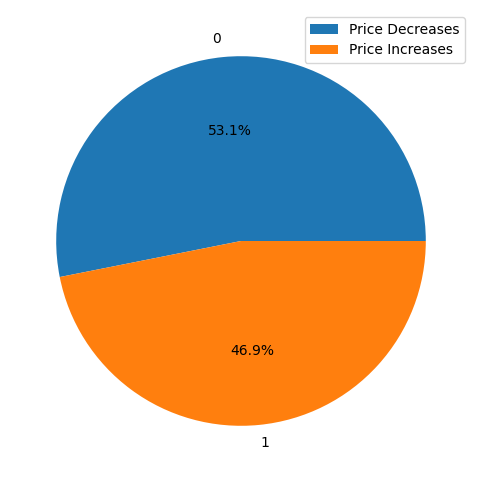

In [ ]:
target_counts = df['target'].value_counts().values
target_labels = [0, 1]
target_legend = ['Price Decreases', 'Price Increases']

# Set the figure size with a wider width
plt.figure(figsize=(8, 6))  # Adjust the values as needed

plt.pie(target_counts, labels=target_labels, autopct='%1.1f%%')
plt.legend(target_legend, loc='upper right')
plt.show()


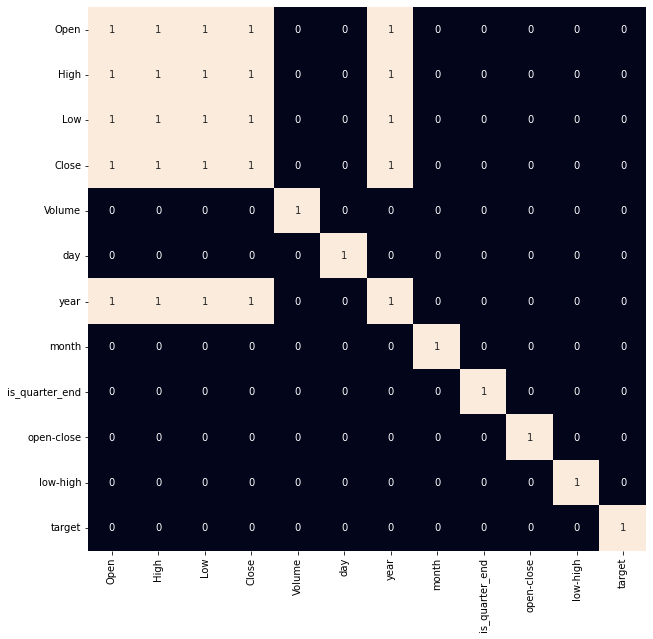

In [ ]:
plt.figure(figsize=(10, 10))
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [ ]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
	features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)


(979, 3) (109, 3)


In [ ]:
max_pred=pred_lin
print(pred_lin)

2192.3755161539857


### ChatBot Feature

In [ ]:
import numpy as np
import nltk
import string
import random

In [ ]:
f=open('chatbot.txt','r',errors='ignore')
raw_doc=f.read()
raw_doc=raw_doc.lower()
nltk.download('punkt')
nltk.download('wordnet')
sent_tok=nltk.sent_tokenize(raw_doc)
word_tok=nltk.word_tokenize(raw_doc)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
lemmer= nltk.stem.WordNetLemmatizer()
def LemTokens(tokens):
  return [lemmer.lemmatize(token) for token in tokens]
remove_pun=dict((ord(punct),None)for punct in string.punctuation)
def LemNormalize(text):
  return LemTokens(nltk.word_tokenize(text.lower().translate(remove_pun)))

In [ ]:
greet_inp=("hello","hi","hey","hola","sup","greetings")
greet_resp=["hi","hey","*nods*","hi there","hey there","I am glad! You are talking to me!"]
def greet(sentence):
  for word in sentence.split():
    if word.lower() in greet_inp:
      return random.choice(greet_resp)

In [ ]:
ask_inp=("what will be the price?","estimated price","predicted price","how much is the price now","price?")
ask_res=max_pred
def ask(sen):
  for word in sen.split():
    if word.lower() in ask_inp:
      return ask_res

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
def res(user_res):
  robol_res=''
  Tfid=TfidfVectorizer(tokenizer=LemNormalize,stop_words='english')
  tfidf=Tfid.fit_transform(sent_tok)
  vals=cosine_similarity(tfidf[-1],tfidf)
  idx=vals.argsort()[0][-2]
  flat=vals.flatten()
  flat.sort()
  req_tfid=flat[-2]
  if(req_tfid==0):
    robol_res=robol_res+"I am sorry! I don't understand you"
    return robol_res
  else:
    robol_res=robol_res+sent_tok[idx]
    return robol_res

In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
flag=True
print("StocKuku: Hey! My name is StocKuku. I am a Stock Prediction ChatBot. Let's have a conversation. You can ask me anything related to Adani Green Energy Limited. If you want to exit type bye")
while(flag==True):
  user_res=input()
  user_res=user_res.lower()
  if(user_res!='bye'):
    if(ask(user_res)!=None):
      print("StocKuku: Pedicted Price > {}".format(ask(user_res)))
    if(user_res=='thanks' or user_res=='thank you'):
      flag=False
      print("StocKuku: You are welcome...")
    else:
      if(greet(user_res)!=None):
        print("StocKuku: "+greet(user_res))
      else:
        sent_tok.append(user_res)
        word_tok=word_tok+nltk.word_tokenize(user_res)
        final_words=list(set(word_tok))
        print("StocKuku: ",end="")
        print(res(user_res))
        sent_tok.remove(user_res)
  else:
    flag=False
    print("StocKuku: Goodbye! Take care <3")

StocKuku: Hey! My name is StocKuku. I am a Stock Prediction ChatBot. Let's have a conversation. You can ask me anything related to Adani Green Energy Limited. If you want to exit type bye
hi
StocKuku: hey
price?
StocKuku: Pedicted Price > 2192.3755161539857
StocKuku: 

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


I am sorry! I don't understand you
bye
StocKuku: Goodbye! Take care <3
